# Section 2 - Descriptive Statistics
You should also have downloaded:
- stocks.csv

## 0 Load and display

We load data on monthly stock returns from 1926 to 2021 ([source](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)) and store it in an $\texttt{ndarray}$ for you.

In [1]:
# Module for arrays.
import numpy as np
# Module for data frames.
import pandas as pd

# Load stock data as pandas DataFrame.
stocks = pd.read_csv("stocks.csv")
# Display DataFrame.
display(stocks)
# Store stock return variable values in a NumPy array.
ret = stocks["Mkt-RF"].values

,Mkt-RF,SMB,HML,RF
0,2.96,-2.56,-2.43,0.22
1,2.64,-1.17,3.82,0.25
2,0.36,-1.40,0.13,0.23
3,-3.24,-0.09,0.70,0.32
4,2.53,-0.10,-0.51,0.31
...,...,...,...,...
1160,2.51,-5.51,-8.85,0.36
1161,0.61,-3.35,-0.04,0.35
1162,0.35,1.61,-7.72,0.36
1163,6.46,1.54,-0.26,0.40


In [2]:
# Print the "ret" variable.
print(ret)

[2.96 2.64 0.36 ... 0.35 6.46 3.21]


In [3]:
# Print the type of the "ret" variable.
print(type(ret))

<class 'numpy.ndarray'>


## 1 Compute Statistics (manual implementation)
**Task:** implement your own functions for these descriptive statistics below. 
- mean
- variance
- standard deviation
- skewness
- kurtosis

The functions should be designed to operate on a one-dimensional $\texttt{ndarray}$. You may use other Scipy and Numpy functions in your implementations.  Apply your functions to the $\texttt{ret}$ data to test them.

In [4]:
# Sample mean.
# use len() and np.sum() 
def my_mean(arr):
    # Sample size (length of array).
    n = len(arr)
    # Sum of array elements divided by sample size.
    return np.sum(arr) / n

In [5]:
# Unbiased sample variance.
# use len(), my_mean(), and np.sum() 
# tip: make a variable for each meaningful term in the formula. makes it easier to debug
def my_var(arr):
    # Sample size.
    n = len(arr)
    # Array of deviations of array elements from sample mean.
    # Note that "array - scalar" will broadcast the subtraction.
    dev = arr - my_mean(arr)
    # Note the use of Bessel"s correction.
    # Note that "array**2" performs squaring elementwise.
    return np.sum(dev**2) / (n - 1)

In [6]:
# Sample standard deviation derived from unbiased sample variance.
# use np.sqrt() and my_var()
def my_std(arr):
    return np.sqrt(my_var(arr))

Let $n$ be the number of samples, $x_1, \dots, x_n$ be the data, and $\overline{x}$ be the sample mean. Define the moments
$$m_k = \frac{1}{n} \sum_i (x_i - \overline{x})^k.$$

The adjusted (unbiased) Fisher-Pearson coefficient of **skewness** is
$$
 \frac{\sqrt{n(n-1)}}{n-2} \frac{m_3}{m_2^{3/2}}.
$$


In [7]:
# Adjusted (unbiased) Fisher-Pearson coefficient of skewness.
# See scipy.stats.skew documentation for the formula. Remember to center the data with the mean before using the formula
# use len(), my_mean(), np.sum(), np.sqrt()
# tip: as before, make variables for each meaningful term
def my_skew(arr):
    # Sample size.
    n = len(arr)
    # Centered data.
    arr_ctd = arr - my_mean(arr)
    # Third central sample moment.
    m3 = np.sum(arr_ctd**3) / n
    # Second central sample moment.
    m2 = np.sum(arr_ctd**2) / n
    # Bias-adjustment cofactor.
    adj = np.sqrt(n*(n-1)) / (n-2)
    return adj * (m3 / m2**(3/2))

The unbiased Fisher coefficient of **excess kurtosis** is
$$
 \frac{n-1}{(n-2)(n-3)} \left[\frac{(n+1) m_4}{m_2^2} - 3(n-1)\right].
$$

In [8]:
# Adjusted Fisher coefficient of excess kurtosis.
# See "sample kurtosis > standard unbiased estimator" in Kurtosis wikipedia page. This lines up with scipy.stats.kurtosis documentation, that unfortunately does not show the formula.
# use len(), my_mean(), np.sum()
# tip: as before, make variables for each meaningful term
def my_kurt(arr):
    # Sample size.
    n = len(arr)
    # Centered data.
    arr_ctd = arr - my_mean(arr)
    # Fourth central sample moment.
    m4 = np.sum(arr_ctd**4) / n
    # Second central sample moment.
    m2 = np.sum(arr_ctd**2) / n
    # Bias-adjustment cofactor.
    adj = (n-1) / ((n-2)*(n-3))
    return adj * ((n+1)*(m4 / (m2**2)) - (n-1)*3)

Written for you is the code to print all these results out. 
- Take some time to understand what each line of code is doing. Presenting numbers with easy-to-read prints will be a helpful skill for your own coding.

In [9]:
# List of labels to print.
label = ["Mean", "Variance", "Standard Deviation", "Skewness", "Kurtosis"]
# List of statistics.
my_value = [my_mean(ret), my_var(ret), my_std(ret), my_skew(ret), my_kurt(ret)]
# Print table.
print("*** My Functions ***")
for i in range(len(label)):
    # Print results in two columns.
    # "{}" is a placeholder for a string.
    # ":" indicates start of format specification.
    # "<" indicates left alignment.
    # "25" indicates field width of 25 characters.
    print("{:<25} {}".format(label[i], my_value[i]))

*** My Functions ***
Mean                      0.6785064377682404
Variance                  28.564041066324506
Standard Deviation        5.344533755747503
Skewness                  0.15628277114358527
Kurtosis                  7.450383902161545


## 2 Compare against SciPy and NumPy

**Task:** Compute the same quantities using the corresponding SciPy or NumPy functions with default arguments. 

In [10]:
# The point of this exercise:
# There are different definitions of the above statistics.
# Some implementations provide parameters that let you choose versions.

# Import specific functions from SciPy.
from scipy.stats import skew, kurtosis

# List of labels.
label = ["Mean", "Variance", "Standard Deviation", "Skewness", "Kurtosis"]
# List of statistics.
package_value = [np.mean(ret), np.var(ret), np.std(ret), skew(ret), kurtosis(ret)]
# Print table.
print("{:<25} {:<20} {:<20}".format('', 'my functions', 'scipy/numpy'))
for i in range(len(label)):
    print("{:<25} {:<20} {:<20}".format(label[i], my_value[i], package_value[i]))

                          my functions         scipy/numpy         
Mean                      0.6785064377682404   0.6785064377682404  
Variance                  28.564041066324506   28.539522576138822  
Standard Deviation        5.344533755747503    5.342239471994757   
Skewness                  0.15628277114358527  0.1560814766802238  
Kurtosis                  7.450383902161545    7.413300610425784   


**Discuss:** Do your functions give different results from those of the numpy/scipy implementations?

If they are different:
- are your implementations incorrect, or 
- can you adjust some parameters of the SciPy or NumPy functions to get the same results as your manual implementations?

In [11]:
# Results differ for variance, standard deviation, skewness, and kurtosis.
# This is because the default parameters set the functions to compute alternative versions of the statistics.

# We can adjust the parameters to match our versions of the statistics.
# Note the extra arguments to the functions.
label = ["Mean", "Variance", "Standard Deviation", "Skewness", "Kurtosis"]
package_value_adj = [np.mean(ret), np.var(ret, ddof=1), np.std(ret, ddof=1), skew(ret, bias=False), kurtosis(ret, bias=False)] # TODO

# Print table.
print("{:<25} {:<20} {:<20}".format('', 'my functions', 'scipy/numpy'))
for i in range(len(label)):
    print("{:<25} {:<20} {:<20}".format(label[i], my_value[i], package_value_adj[i]))

# Results are now within a roundoff error of each other.
# Roundoff error is due to alternative arithmetic implementation.

                          my functions         scipy/numpy         
Mean                      0.6785064377682404   0.6785064377682404  
Variance                  28.564041066324506   28.564041066324506  
Standard Deviation        5.344533755747503    5.344533755747503   
Skewness                  0.15628277114358527  0.15628277114358524 
Kurtosis                  7.450383902161545    7.450383902161546   


## 3 Are stocks normally distributed? Visual comparison.

The normal distribution is commonly used to model natural and social phenomena. Investigate whether the hypothesis that stock return is normally distributed is plausible.

**Task:**
- Simulate draws from a normal distribution having 
    - mean equal to the sample mean of the stock returns and 
    - standard deviation equal to the sample standard deviation of the stock returns. 
    - Use a random state of 0, and 
    - for the number of draws, use the number of stock return observations.
- (Done for you) Compare histograms of the simulated data and the actual stock returns.
    - **Discuss:** Note how we choose the bins carefully. If you changed the 'bins=mybins' to 'bins=100', what difference do you see?

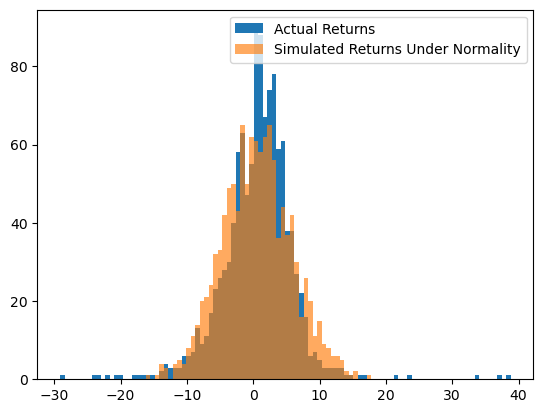

In [12]:
# Import class for normal distribution from SciPy.
# It is customary to import this under an alias because "norm" is used for vector norms.
from scipy.stats import norm as gaussian
# Import class for plotting.
import matplotlib.pyplot as plt

# Number of stock return observations.
n = len(ret)
# Simulate normal random variates using a method.
# Note specification of random state (seed).
sim = gaussian.rvs(loc=np.mean(ret), scale=np.std(ret), size=n, random_state=0) # TODO

# Plot frequency histograms.
_, mybins, _ = plt.hist(ret, bins=100, label="Actual Returns")
# alpha controls transparency.
plt.hist(sim, bins=mybins, alpha=0.66, label="Simulated Returns Under Normality")
# Display legend.
plt.legend()
# Shows previously specified plot elements.
plt.show()

# The returns exhibit fatter tails in comparison to the simulated normal data.
# This is called "excess kurtosis" or "leptokurtosis."
# It indicates that extreme outcomes are more probable than under a normal distribution.
# Excess kurtosis is a commonly observed feature of asset returns.
# The hypothesis that the historical stock return is normally distributed is implausible based on differing kurtosis.